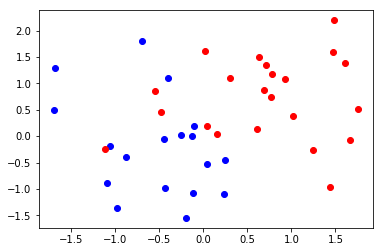

[1.09006246]


In [17]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import time

# definition of constant values
n = 40
lam = 1

# create dataset
omega = np.random.randn(1)
noise = 0.8 * np.random.randn(n)
x = np.random.randn(n, 2)
y = np.where(omega * x[:, 0] + x[:, 1] + noise > 0, 1, -1)

# plot dataset
def plot_dataset(show=True, axes=plt):
    for data, label in zip(x,y):
        color= 'b' if label < 0 else 'r'
        axes.plot(data[0], data[1], color+'o')
    if show: plt.show()
        
plot_dataset()
print(omega)

In [18]:
# declation of variables
w1 = Symbol('w1')
w2 = Symbol('w2')
w = np.array([w1, w2])

# define J(w)
j = sum([log(exp(tmp) + 1) for tmp in -y * np.sum(w * x, axis=1)]) + lam * sum(w * w) 
    

# batch steepest gradient method
def gradient_method(epoch=10, lr=0.2):
    grad = diff(j, w)
    omega = np.ones_like(w)
    js = []
    t = time.time()
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{:02d} step:\tJ={}\tw={}'.format(step, js[step], omega))
        omega = omega - lr * grad.subs([(w1, omega[0]), (w2, omega[1])])
    print("Finish training in {} s.".format(time.time() - t))
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    # plot J_t
    axL.plot(np.arange(epoch+1), np.array(js))
    # plot datasets and draw boundary
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'g-')
    plot_dataset(False, axes=axR)
    
    
# Newton based method
def newton_method(epoch=10):
    t= time.time()
    omega = np.ones_like(w)
    d1, d2 = Symbol('d1'), Symbol('d2')
    d = np.array([d1, d2])
    js = []
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{:02d} step:\tJ={}\tw={}'.format(step, js[step], omega))
        grad = diff(j, w).subs([(w1, omega[0]), (w2, omega[1])])
        hesian = np.array(diff(j, w, 2).subs([(w1, omega[0]), (w2, omega[1])])).reshape(2, 2)
        omega  += np.array(list(solve(np.dot(hesian, d) + grad).values()))
    print("Finish training in {} s.".format(time.time() - t))
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    # plot J_t
    axL.plot(np.arange(epoch+1), np.array(js))
    # plot datasets and draw boundary
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'g-')
    plot_dataset(False, axes=axR)

00 step:	J=17.6125673918693	w=[1 1]
01 step:	J=17.1766570118697	w=[1.43323197926548 0.741232459483461]
02 step:	J=17.1366237795271	w=[1.33269596675490 0.850358907557570]
03 step:	J=17.1333547890973	w=[1.34657729383829 0.806991529037462]
04 step:	J=17.1329083019427	w=[1.34372520484044 0.823821378869861]
05 step:	J=17.1328413369707	w=[1.34438776222438 0.817250956431732]
06 step:	J=17.1328313713246	w=[1.34418594387616 0.819794362443672]
07 step:	J=17.1328298737928	w=[1.34425455086492 0.818808187990618]
08 step:	J=17.1328296494636	w=[1.34422915393090 0.819190036136614]
09 step:	J=17.1328296158137	w=[1.34423878245415 0.819042144161732]
10 step:	J=17.1328296107687	w=[1.34423507900378 0.819099411658194]
Finish training in 2.3771729469299316 s.


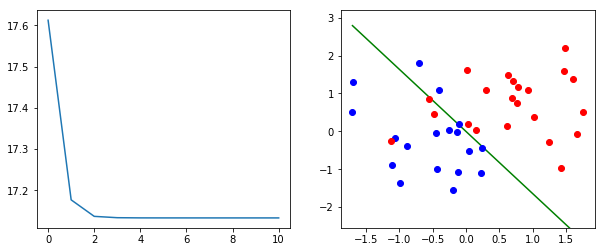

In [19]:
# run the batch steepest gradient method and show the result.
gradient_method()

00 step:	J=17.6125673918693	w=[1 1]
01 step:	J=17.1346207802773	w=[1.31930899649519 0.818299501474153]
02 step:	J=17.1328296891498	w=[1.34407144043432 0.819060874148084]
03 step:	J=17.1328296098788	w=[1.34423610242957 0.819083423907452]
04 step:	J=17.1328296098788	w=[1.34423610990288 0.819083425577619]
05 step:	J=17.1328296098788	w=[1.34423610990288 0.819083425577619]
06 step:	J=17.1328296098788	w=[1.34423610990288 0.819083425577619]
07 step:	J=17.1328296098788	w=[1.34423610990288 0.819083425577619]
08 step:	J=17.1328296098788	w=[1.34423610990288 0.819083425577619]
09 step:	J=17.1328296098788	w=[1.34423610990288 0.819083425577619]
10 step:	J=17.1328296098788	w=[1.34423610990288 0.819083425577619]
Finish training in 29.27251100540161 s.


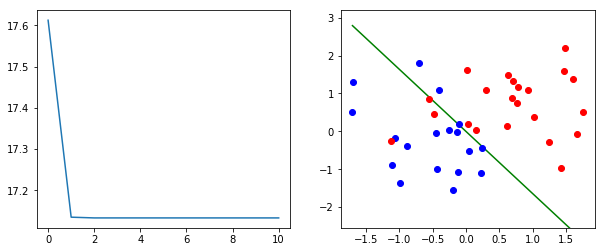

In [20]:
# run the Newton based method and show the result.
newton_method()